In [1]:
import os
import scipy
import warnings
import math
import time

import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
import scipy.stats       as stats

from scipy.optimize    import curve_fit
from scipy.stats.stats import pearsonr
from datetime          import datetime

from tqdm import tqdm_notebook as tqdm

def func_linear(x, k, c):
    return k*x+c

def func_gauss(x, sigm, mu, A):
    return np.exp(-((x-mu)**2)/(2*sigm**2))*A

warnings.simplefilter('ignore')
plt.style.available
plt.style.use('seaborn-ticks')  # Красивые графики


In [41]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity']
Itog = pd.DataFrame(columns = new_names)

#Чтение данных
for I in tqdm(range(2012,2019,1)):
    directory = 'D:/variations/MEPHI10-18/%s' %( str(I) )
    files = os.listdir(directory) 
    for i in (files):
        s=str(i)
        if (len(s)== 10):

            data1 = pd.read_csv(r"D:/variations/MEPHI10-18/%s/%s" %( str(I), str(i) ), 
                                names = new_names, 
                                delim_whitespace = True, 
                                usecols = [1,2,3,4,9,10,11]
                               )
            data1['D'] = int( s[5:7:1] )
            data1['M'] = int( s[2:4:1] )
            data1['Y'] = int( '20'+s[8:] )
            data1 ['H'] = [d//12 for d in range ( 0,data1.shape[0],1 )]
            
            for d in range ( 0,data1.shape[0]//12,1 ):
                data1.loc[data1['H'] == d, 'Neutr1'] = data1[data1['H'] == d]['Neutr1'].mean()
                data1.loc[data1['H'] == d, 'Neutr2'] = data1[data1['H'] == d]['Neutr2'].mean()
                data1.loc[data1['H'] == d, 'Neutr3'] = data1[data1['H'] == d]['Neutr3'].mean()
                data1.loc[data1['H'] == d, 'Neutr4'] = data1[data1['H'] == d]['Neutr4'].mean()

            data1.drop_duplicates(subset = 'H', keep = 'first', inplace = True)   
            data1.dropna(inplace = True)
            data1 = data1[data1['Neutr1']>0][data1['Neutr2']>0][data1['Neutr3']>0][data1['Neutr4']>0][data1['H']<8]
            data1.to_csv(r"D:/variations/MEPHI10-18/data_1h.txt", sep = ' ', header = False, index = False, mode ='a+')
   
    
# Для часового разбиения
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\data_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog.apply(lambda x: str(int(x['D']))+'-'+str(int(x['M']))+'-'+str(int(x['Y']))+' '+str(int(x['H']))+':'+str(0),axis=1), format = "%d-%m-%Y %H:%M", yearfirst = False, dayfirst = True)

Itog.to_csv(r"D:/variations/MEPHI10-18/data_1h.txt", sep = ' ', header = False, index = False, mode ='w') 
# Для часового разбиения


Exception in thread Thread-28:
Traceback (most recent call last):
  File "C:\Users\User\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\User\Anaconda3\lib\site-packages\tqdm\_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\User\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



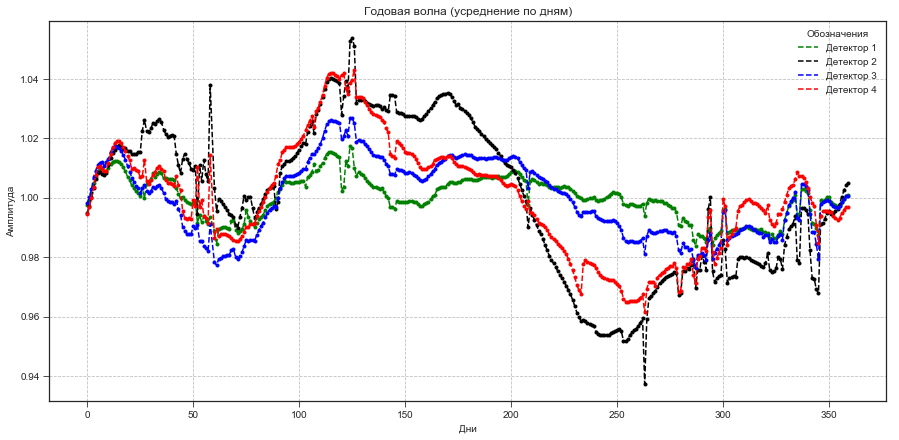

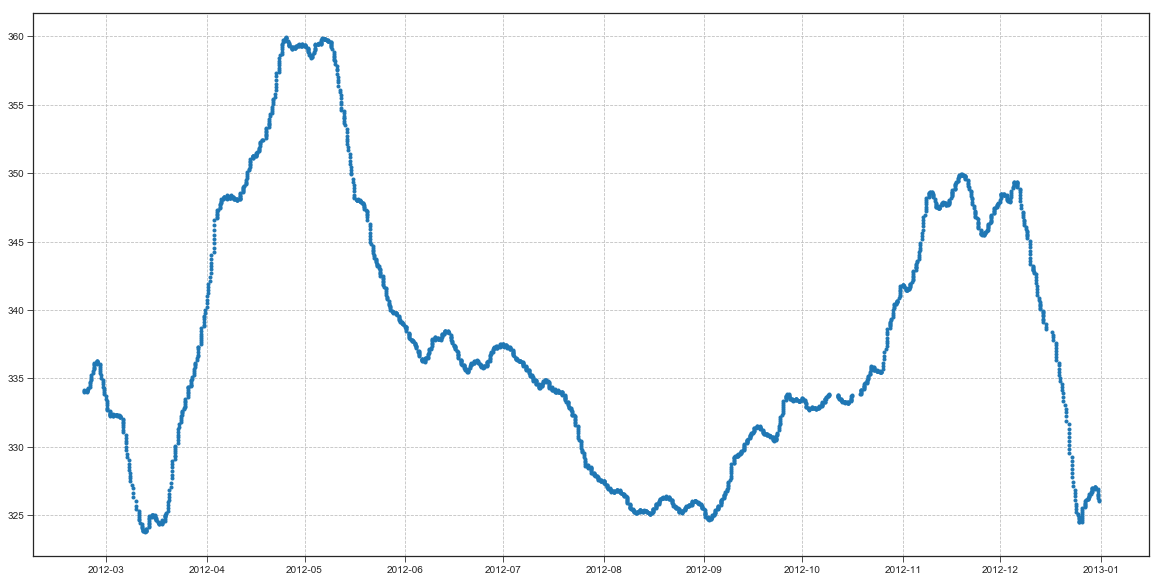

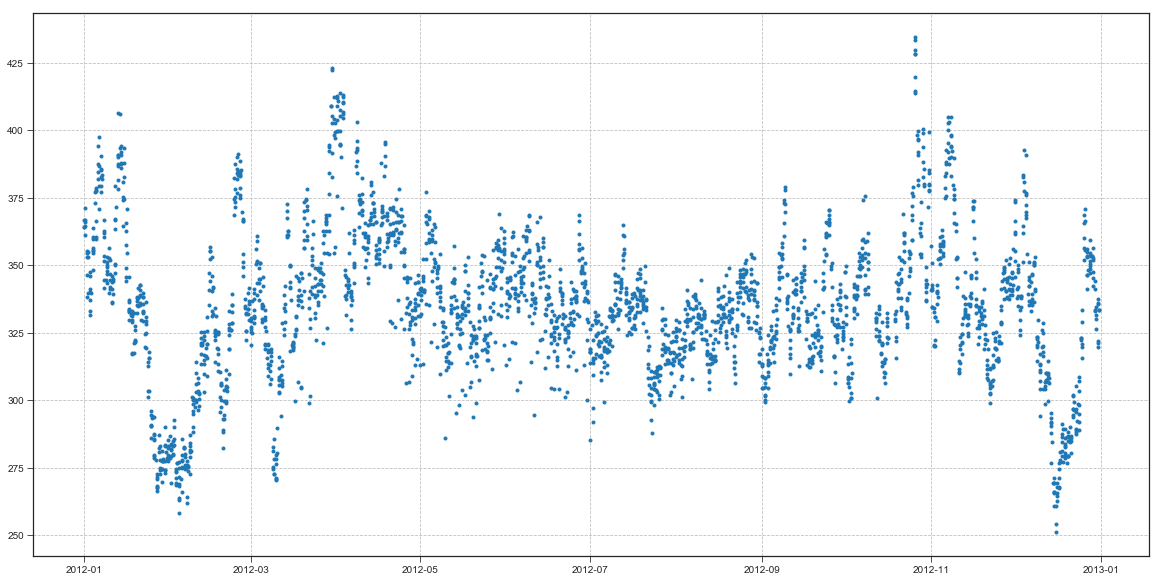

In [119]:
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\data_1h.txt", names = new_names, delim_whitespace = True)
# Для часового разбиения
Itog['date'] = pd.to_datetime(Itog['date'])
Itog = Itog.drop(Itog[Itog['Y'] == 2018].index) 

# Чистка по первому детектору
    # 2012
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr1']<85)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr1']>120)) ].index)
    # 2013 
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr1']<80)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr1']>120)) ].index)
    # 2014
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2014)&(Itog['Neutr1']<85)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2014)&(Itog['Neutr1']>120)) ].index)
    # 2015
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2015)&(Itog['Neutr1']<85)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2015)&(Itog['Neutr1']>120)) ].index)
    # 2016
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr1']<85)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr1']>120)) ].index)
    # 2017
Itog = Itog.drop(Itog.loc[ ( (Itog['date']<'25-08-2017 0:0')&(Itog['Neutr1']<80) &(Itog['date']>='01-01-2017 0:0') ) ].index)
Itog = Itog.drop(Itog.loc[ ( (Itog['date']<'25-08-2017 0:0')&(Itog['Neutr1']>120)&(Itog['date']>='01-01-2017 0:0') ) ].index)
Itog = Itog.drop(Itog.loc[ ( (Itog['date']>'25-08-2017 0:0')&(Itog['Neutr1']>160)&(Itog['date']<'01-01-2018 0:0') ) ].index)
Itog = Itog.drop(Itog.loc[ ( (Itog['date']>'25-08-2017 0:0')&(Itog['Neutr1']>100)&(Itog['date']<'01-01-2018 0:0') ) ].index)
    # 2018
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr1']<100)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr1']>150)) ].index)
# Чистка по первому детектору



# Чистка по второму детектору
    # 2012
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr2']<275)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr2']>450)) ].index)
    # 2013
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr2']<280)&(Itog['M']<=4) ) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr2']>450)&(Itog['M']<=4) ) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr2']>450)&(Itog['M']>=7)&(Itog['M']<12)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr2']<280)&(Itog['M']>=7)&(Itog['M']<12)) ].index)
    # 2014
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2014)&(Itog['Neutr2']<250)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2014)&(Itog['Neutr2']>500)) ].index)
    # 2015
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2015)&(Itog['Neutr2']>430)) ].index)
    # 2016
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr2']<260)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr2']>440)) ].index)
    # 2017
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2017)&(Itog['Neutr2']<275)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2017)&(Itog['Neutr2']>500)) ].index)  
    # 2018
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr2']<280)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr2']>450)) ].index)
# Чистка по второму детектору



# Чистка по третьему детектору
    # 2012
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr3']<225)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr3']>390)) ].index)
    # 2013
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr3']<275)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr3']>390)) ].index)
    # 2014
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2014)&(Itog['Neutr3']<230)) ].index)
    # 2015
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2015)&(Itog['Neutr3']<250)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2015)&(Itog['Neutr3']>400)) ].index)
    # 2016
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr3']<290)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr3']>400)) ].index)
    # 2017
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2017)&(Itog['Neutr3']<275)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2017)&(Itog['Neutr3']>450)) ].index)
    # 2018
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr3']<280)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr3']>420)) ].index)
# Чистка по третьему детектору



# Чистка по четвертому детектору
    # 2012
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr4']<250)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2012)&(Itog['Neutr4']>430)) ].index)
    # 2013
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr4']<270)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2013)&(Itog['Neutr4']>400)) ].index)
    # 2014
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2014)&(Itog['Neutr4']<250)) ].index)
    # 2016
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2016)&(Itog['Neutr4']<340)) ].index)
    # 2017
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2017)&(Itog['Neutr4']<340)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2017)&(Itog['Neutr4']>575)) ].index)
    # 2018
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr4']<375)) ].index)
Itog = Itog.drop(Itog.loc[ ((Itog['Y']==2018)&(Itog['Neutr4']>540)) ].index)
# Чистка по четвертому детектору



# Сглаживание
for i in ('Neutr1', 'Neutr2', 'Neutr3', 'Neutr4'):
    Itog[i] = pd.rolling_mean(Itog[i], window = 24*7*2)
Itog.dropna(inplace = True)    
# Сглаживание
Itog.to_csv(r"D:/variations/MEPHI10-18/data_1h_1.txt", sep = ' ', header = False, index = False, mode ='w') 

# Построение графиков очищенного темпа счета по годам
#for i in tqdm( range(2012,2019,1) ):
#    for j in range(1,5,1):
#        plt.figure(figsize = (20, 10))
#        plt.plot(Itog[Itog['Y']==i]['date'],Itog[Itog['Y']==i]['Neutr%s'%j],'.')
#        plt.grid(True, linestyle='--', color='0.75')
        #plt.savefig( 'D:/variations/MEPHI10-18/pictures/%s/real_data_clear_det%s.png' %( str(i),str(j) )  ) 
        #plt.close()  
        
        

        
# Удаление трендов
# Поправка данных в первом детекторе за 2018
#Itog.loc[ Itog['Y']==2018, 'Neutr1' ] = Itog[Itog['Y']==2018]['Neutr1'] - np.mean( Itog[Itog['Y']==2018]['Neutr1'] ) + np.mean( Itog[Itog['Y']<2018]['Neutr1'] )

# Удаление линейного тренда со всех данныых детектора 3
x = np.array( [ i for i in range(Itog.shape[0]) ] )
y = Itog['Neutr3']
z = np.polyfit(x,y,1)
Itog['Neutr3'] = y - z[0]*x + z[0]*np.mean(x)

# Удаление линейного тренда с 01.09.2014 в четвертом детекторе
x = Itog[Itog['date']>='2014-09-01'].index
y = Itog[Itog['date']>='2014-09-01']['Neutr4']
z = np.polyfit(x,y,1)
Itog.loc[Itog['date']>='2014-09-01','Neutr4'] = y - z[0]*x + z[0]*(np.mean(x) - np.mean(Itog[Itog['date']<'2014-09-01']['Neutr4'].index) 
)
# Удаление трендов
#Годовая волна в записи по дням
year_wave = pd.DataFrame()
index = 0
arr_new = []
for i in tqdm( range(1,13,1) ):
    for j in range(1,31,1):
        for l in range (1,5,1):
            year_wave.loc[index,l] = np.mean( Itog[Itog['M'] == i][Itog['D'] == j]['Neutr%s' %(l)] )
        if index == 58: arr_new = Itog[Itog['M'] == i][Itog['D'] == j]
        index+=1
        
#        Itog = Itog.drop(Itog[Itog['Y'] == 2018].index) 
#year_wave = year_wave.drop(year_wave[year_wave.index==55])
year_wave.dropna(inplace = True)        
s = ['g','k','blue','r']
plt.figure(figsize = (15, 7))
plt.grid(True, linestyle='--', color='0.75')
for i in range(1,5,1):

    plt.plot(year_wave[i]/year_wave[i].mean(), '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    plt.legend(title='Обозначения')
    plt.plot(year_wave[i]/year_wave[i].mean(), '.', color = '%s' %(s[i-1]), label = '')
    plt.xlabel('Дни')
    plt.ylabel('Амплитуда')
    plt.title('Годовая волна (усреднение по дням)')
    
#for j in range(1,5,1):
#        plt.figure(figsize = (20, 10))
#        plt.plot(Itog['date'],Itog['Neutr%s'%j],'.')
#        plt.grid(True, linestyle='--', color='0.75')
#        plt.plot(arr_new['date'],arr_new['Neutr%s'%j],'r.')
#ТЕПЕРЬ МОЖНО ИСПОЛЬЗОВАТЬ МЕТОД НАЛОЖЕНИЯ ЭПОХ

plt.figure(figsize = (20, 10))
plt.plot(Itog[Itog['Y']==2012]['date'],Itog[Itog['Y']==2012]['Neutr4'],'.')
plt.grid(True, linestyle='--', color='0.75')


new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\data_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
plt.figure(figsize = (20, 10))
plt.plot(Itog[Itog['Y']==2012]['date'],Itog[Itog['Y']==2012]['Neutr4'],'.')
plt.grid(True, linestyle='--', color='0.75')

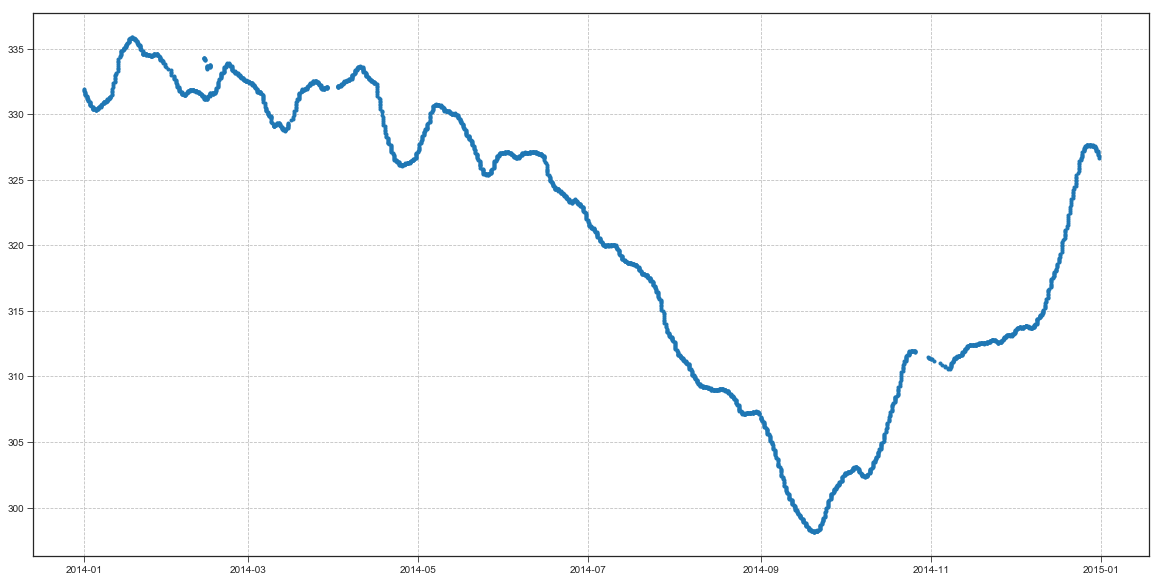

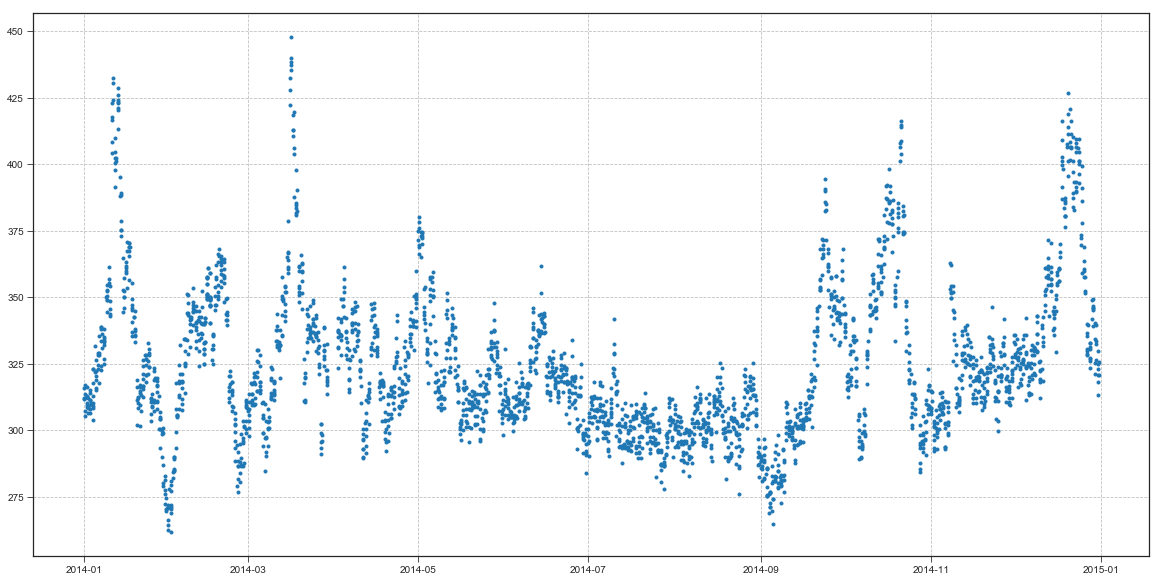

In [94]:
plt.figure(figsize = (20, 10))
plt.plot(Itog[Itog['Y']==2014]['date'],Itog[Itog['Y']==2014]['Neutr4'],'.')
plt.grid(True, linestyle='--', color='0.75')


new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H', 'date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\data_1h.txt", names = new_names, delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
plt.figure(figsize = (20, 10))
plt.plot(Itog[Itog['Y']==2014]['date'],Itog[Itog['Y']==2014]['Neutr4'],'.')
plt.grid(True, linestyle='--', color='0.75')

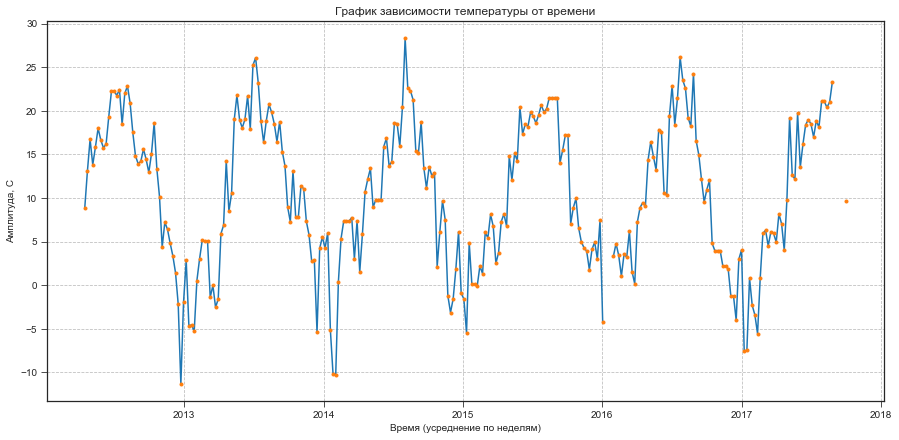

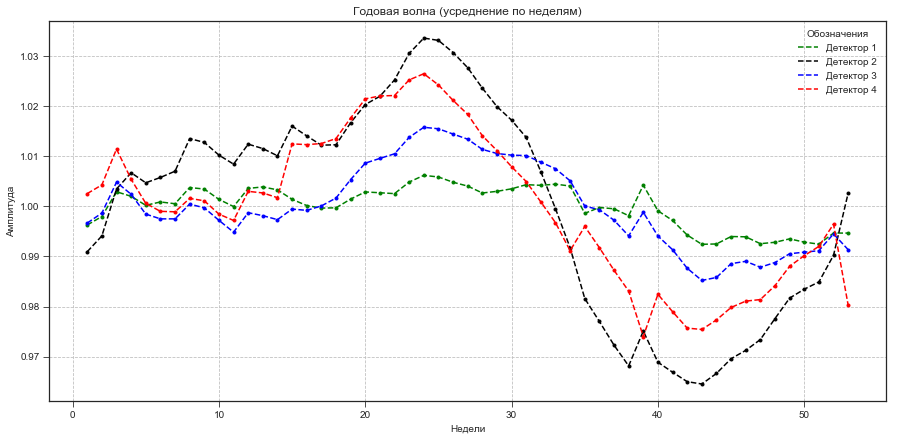

In [81]:
# Годовая волна в записи по неделям    
Itog = Itog.set_index('date')     
Itog = Itog.resample('W').mean()

year_wave = pd.DataFrame()
for i in range (1,Itog.index.week.max()+1,1):
    for j in range (1,5,1):
        year_wave.loc[i, j]  = Itog.loc[Itog.index.week == i]['Neutr%s'%j].mean()

plt.figure(figsize = (15, 7)) 
plt.plot(Itog.index, Itog['T, C'], '-')
plt.plot(Itog.index, Itog['T, C'], '.')
plt.grid(True, linestyle='--', color='0.75')
plt.xlabel('Время (усреднение по неделям)')
plt.ylabel('Амплитуда, C')
plt.title('График зависимости температуры от времени')

s = ['g','k','blue','r']
plt.figure(figsize = (15, 7))
plt.grid(True, linestyle='--', color='0.75')
for i in range(1,5,1):
    
    plt.plot(year_wave[i]/year_wave[i].mean(), '--', color = '%s' %(s[i-1]), label = 'Детектор %s' %i)
    plt.legend(title='Обозначения')
    plt.plot(year_wave[i]/year_wave[i].mean(), '.', color = '%s' %(s[i-1]), label = '')
    plt.xlabel('Недели')
    plt.ylabel('Амплитуда')
    plt.title('Годовая волна (усреднение по неделям)') 

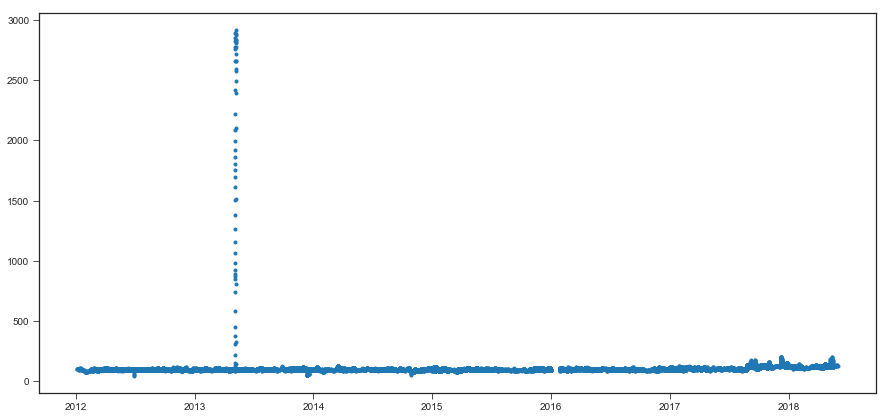

In [3]:
# Чтение данных без очистки
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_onlydata_1h.txt", 
                   names = new_names, 
                   delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
# Сглаживание можно применить сильное
for i in ('Neutr1', 'Neutr2', 'Neutr3', 'Neutr4'):
    Itog[i] = Itog[i].rolling(window = 10,win_type = 'blackmanharris').mean()
Itog.dropna(inplace = True)
Itog
plt.figure(figsize = (15, 7))
plt.plot(Itog['date'],Itog['Neutr1'],'.')

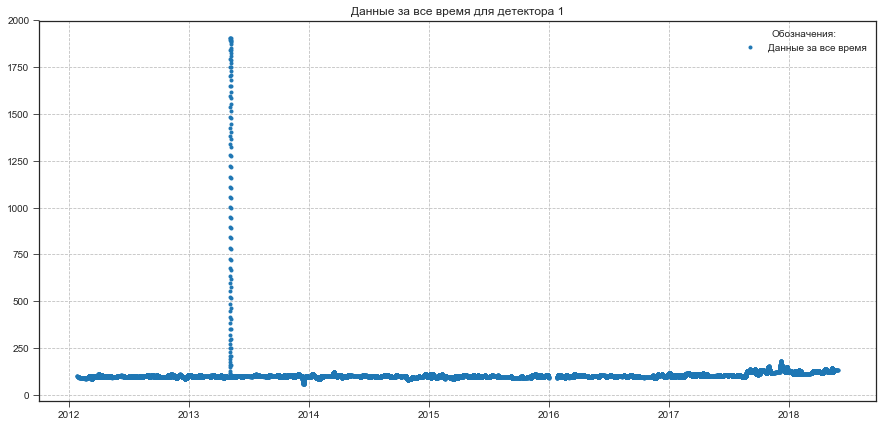

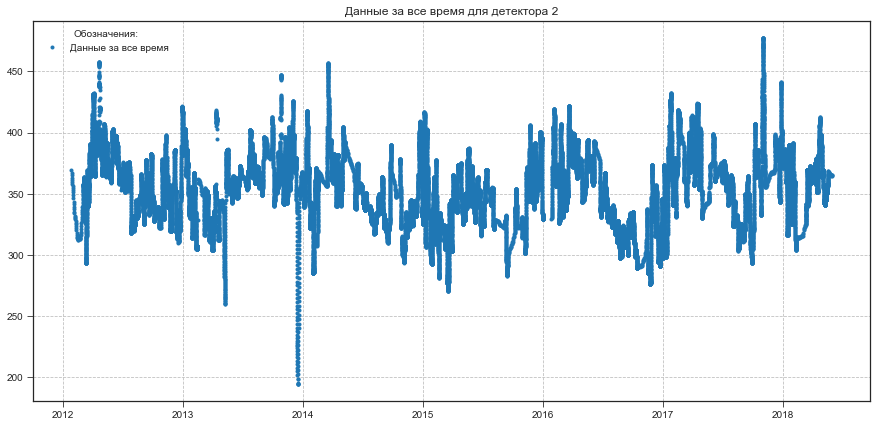

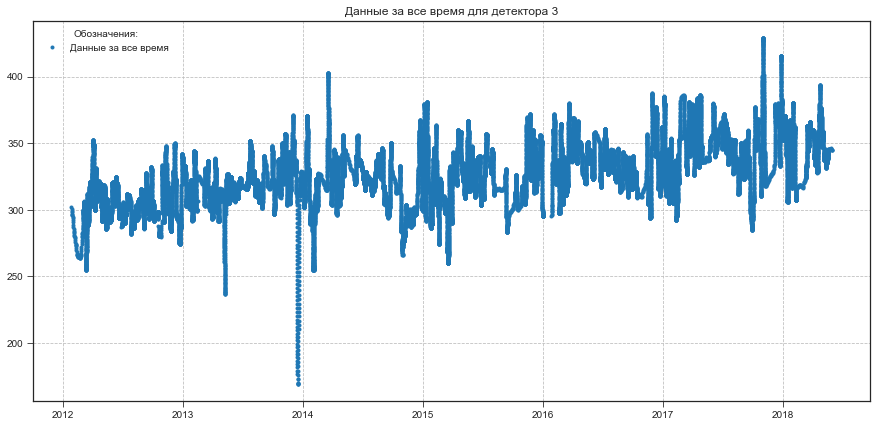

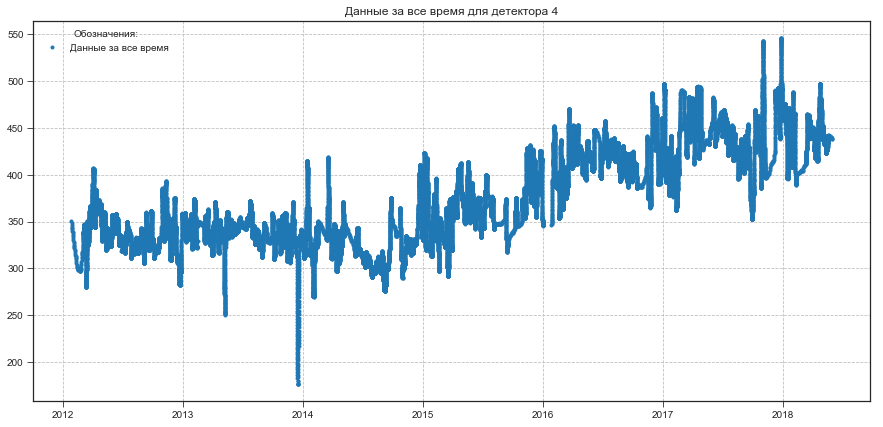

In [7]:
# Чтение данных без очистки
new_names = ['Neutr1', 'Neutr2', 'Neutr3', 'Neutr4','Pressure', 'T, C', 'Humidity', 'D', 'M', 'Y', 'H','date']
Itog = pd.read_csv(r"D:\variations\MEPHI10-18\1h\Result_onlydata_1h.txt", 
                   names = new_names, 
                   delim_whitespace = True)
Itog['date'] = pd.to_datetime(Itog['date'])
# Сглаживание можно применить сильное
for i in ('Neutr1', 'Neutr2', 'Neutr3', 'Neutr4'):
    Itog[i] = Itog[i].rolling(window = 50).mean()
Itog.dropna(inplace = True)

for i in tqdm( range (1,5,1) ):
    plt.figure(figsize = (15, 7)) 
    plt.title ('Данные за все время для детектора %s' %i) 
    plt.plot  (Itog['date'], Itog['Neutr%s'%i], '.', label = 'Данные за все время')
    plt.grid  (True, linestyle='--', color='0.75') 
    plt.legend(title = 'Обозначения:')
